
Abstract

This dataset tells how to estimate price of mobiles a company creates. OUr goal is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.

We do not have to predict actual price but a price range indicating how high the price is.

Goal - Classify Mobile Price Range

The target -> price_range has 4 categories:

0 (Low Cost)

1 (Medium Cost)

2 (High Cost)

3 (Very High Cost)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_data=pd.read_csv('https://raw.githubusercontent.com/jayanti-neu/datasets/main/mobile_price_classification/train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/jayanti-neu/datasets/main/mobile_price_classification/test.csv')

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
numeric_columns_data=train_data[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
numeric_columns_data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


<Figure size 500x500 with 0 Axes>

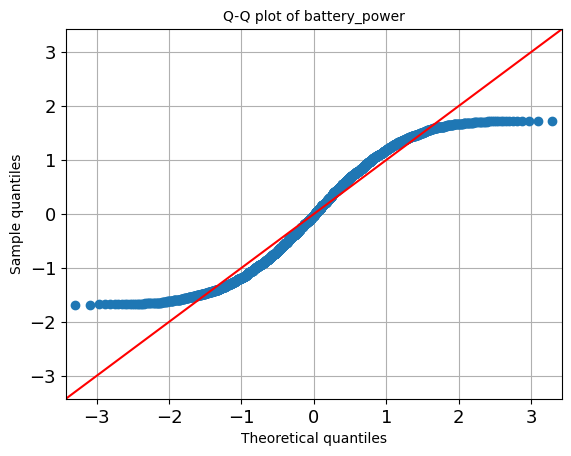

<Figure size 500x500 with 0 Axes>

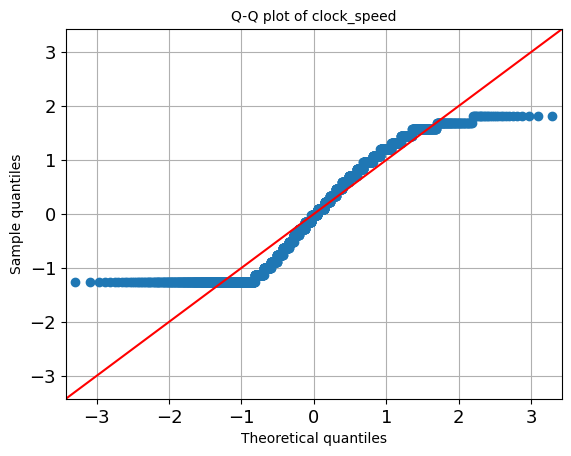

<Figure size 500x500 with 0 Axes>

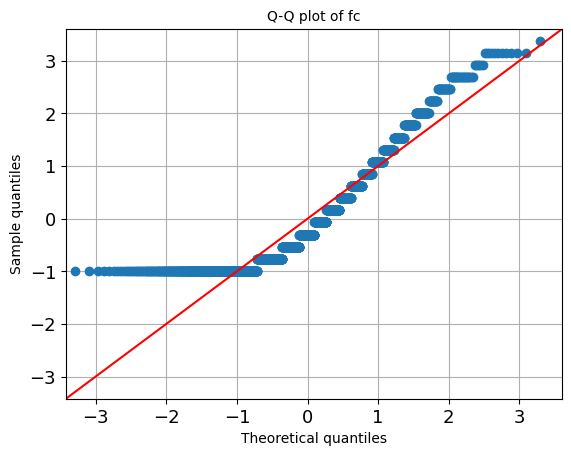

<Figure size 500x500 with 0 Axes>

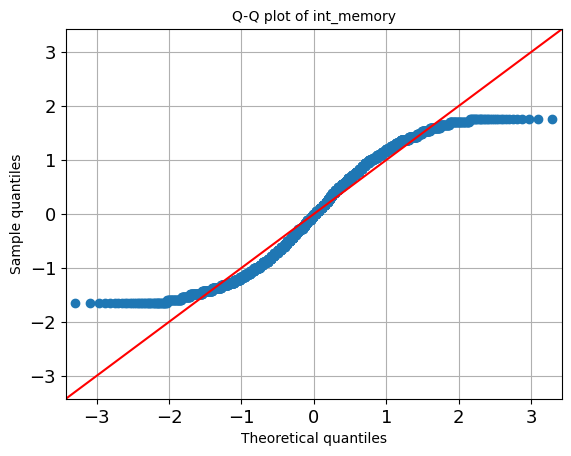

<Figure size 500x500 with 0 Axes>

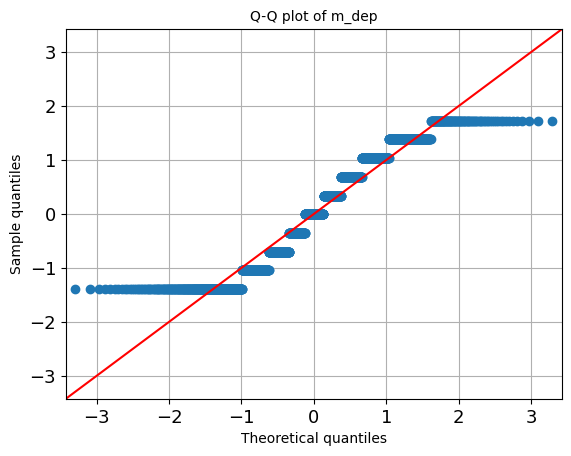

<Figure size 500x500 with 0 Axes>

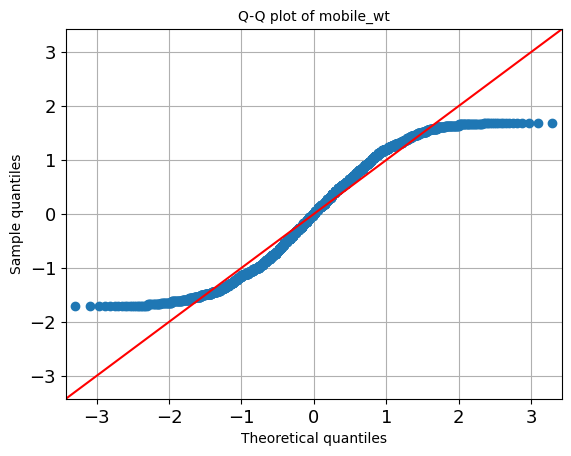

<Figure size 500x500 with 0 Axes>

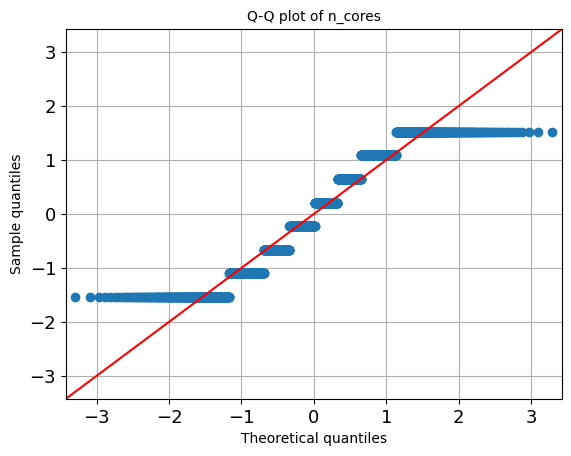

<Figure size 500x500 with 0 Axes>

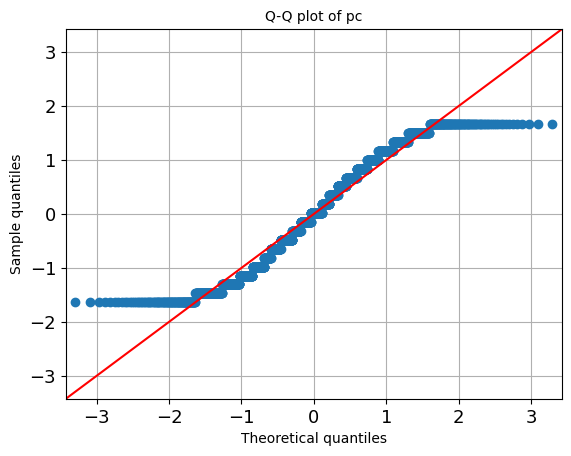

<Figure size 500x500 with 0 Axes>

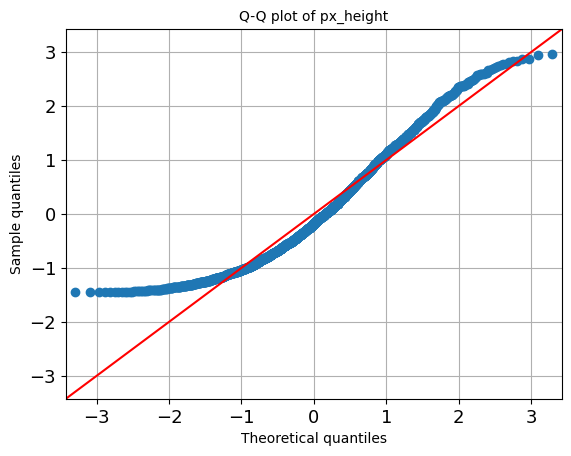

<Figure size 500x500 with 0 Axes>

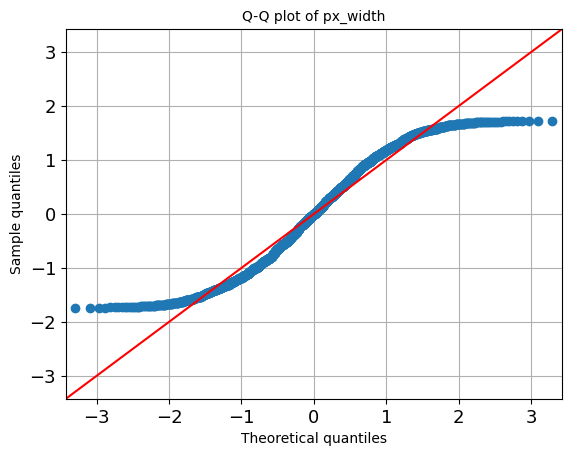

<Figure size 500x500 with 0 Axes>

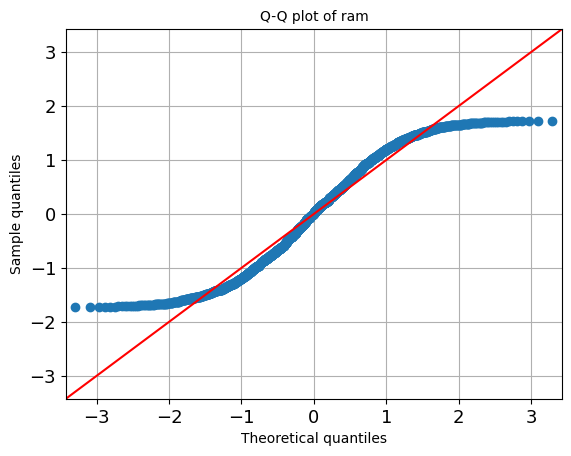

<Figure size 500x500 with 0 Axes>

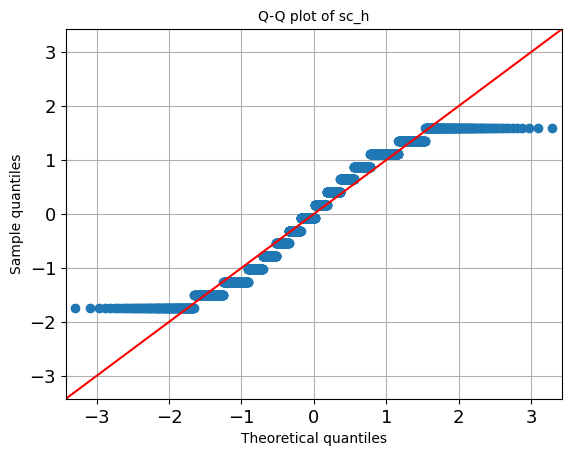

<Figure size 500x500 with 0 Axes>

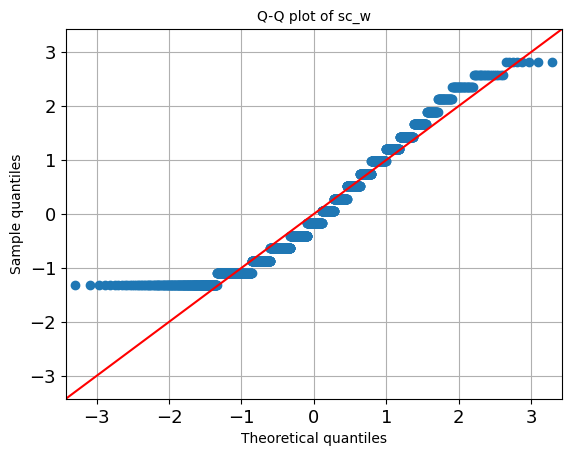

<Figure size 500x500 with 0 Axes>

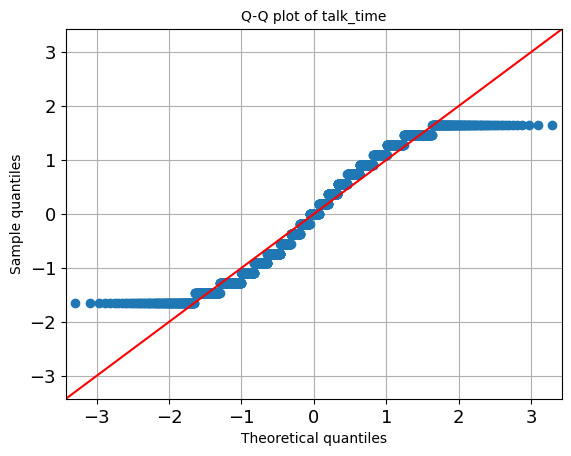

In [7]:
from statsmodels.graphics.gofplots import qqplot

for col in numeric_columns_data.columns[:]:
  plt.figure(figsize=(5,5))
  fig=qqplot(numeric_columns_data[col],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=10)
  plt.ylabel("Sample quantiles",fontsize=10)
  plt.title("Q-Q plot of {}".format(col),fontsize=10)
  plt.grid(True)
  plt.show()

<Axes: >

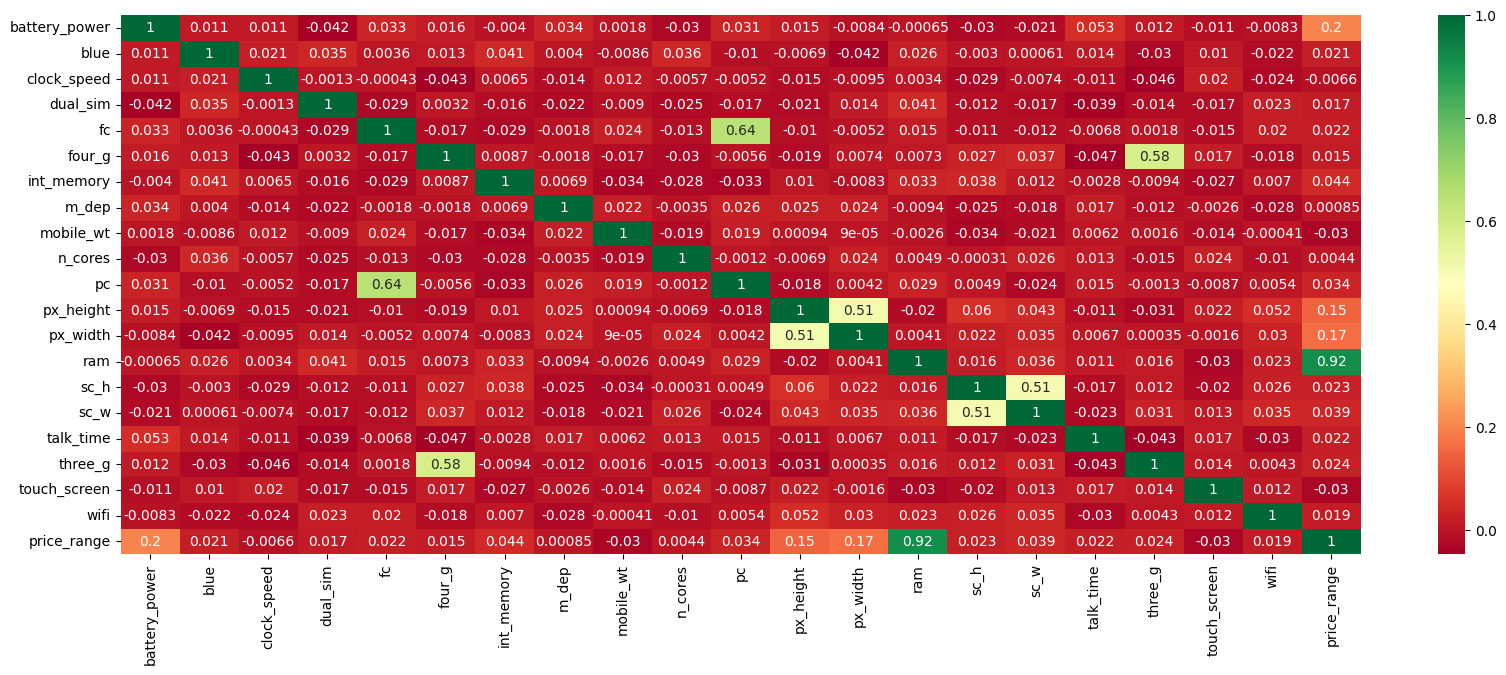

In [8]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")


From the the heatmaps and pairplot we can see ram is the most important variable for predicting the target variable, price_range. Other important variables also include battery_power, px_width, and px_height.

these are important for finding the linear relationships between the variables and their correlation does not imply causation in itself

<Axes: >

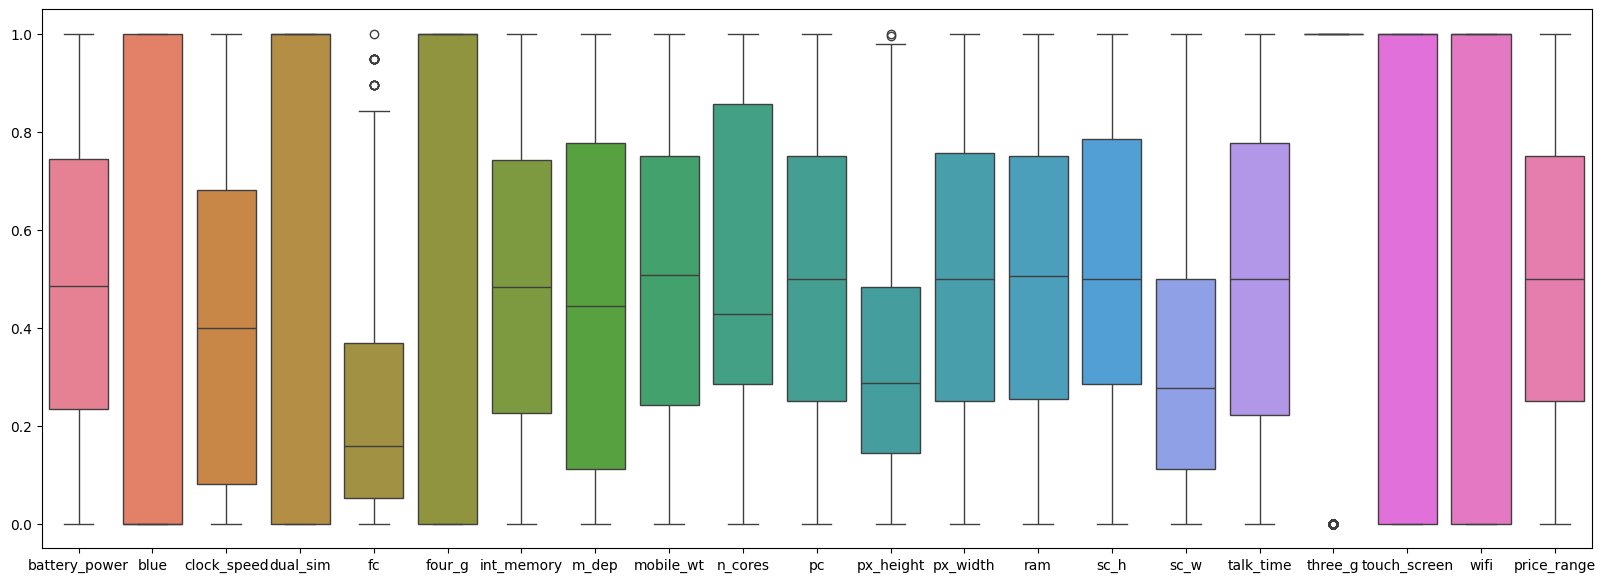

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

plt.figure(figsize=(20, 7))
sns.boxplot(data=df_normalized)

In [15]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

train_data_no_outliers = train_data[~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)]
train_data_no_outliers.shape

(1506, 21)

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train_data_no_outliers.iloc[:,:-1]
y = train_data_no_outliers["price_range"]
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


# Training with AutoML H2o library

In [17]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.1 MB/s eta 0:00:00


In [18]:
import h2o
from h2o.automl import H2OAutoML

In [20]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptbcgjj4x
  JVM stdout: /tmp/tmptbcgjj4x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptbcgjj4x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_3g3ual
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [66]:
datafile_path = 'https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv'
df = h2o.import_file(datafile_path)
data = pd.read_csv('https://raw.githubusercontent.com/jayanti-neu/dsem-assignment2/main/train.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
#Display all columns in X
X=df.columns
print(X)
#Seperate Dependent variable from Independent variable
y ='price_range'
X.remove(y)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [68]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [69]:
df_train['price_range'].table()

price_range,Count
0,394
1,386
2,395
3,419


In [70]:

#Display all columns in X
X=df.columns
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [71]:
y ='price_range'
X.remove(y)
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [72]:

# Set up AutoML
aml = H2OAutoML(
    max_runtime_secs=(300),  # 5 minutes
    max_models=None,  # no limit
    seed=17 #for reproducibility
)


#pass the data through H20AutoML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),15/72
# GBM base models (used / total),6/26
# XGBoost base models (used / total),5/36
# DeepLearning base models (used / total),4/7
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [73]:

model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_4_AutoML_2_20240403_30019': 0,
 'StackedEnsemble_AllModels_3_AutoML_2_20240403_30019': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_2_20240403_30019': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240403_30019': 3,
 'StackedEnsemble_AllModels_2_AutoML_2_20240403_30019': 4,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240403_30019': 5,
 'StackedEnsemble_AllModels_1_AutoML_2_20240403_30019': 6,
 'GBM_grid_1_AutoML_2_20240403_30019_model_12': 7,
 'GLM_1_AutoML_2_20240403_30019': 64}

In [74]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])


best_model.algo

7


'gbm'

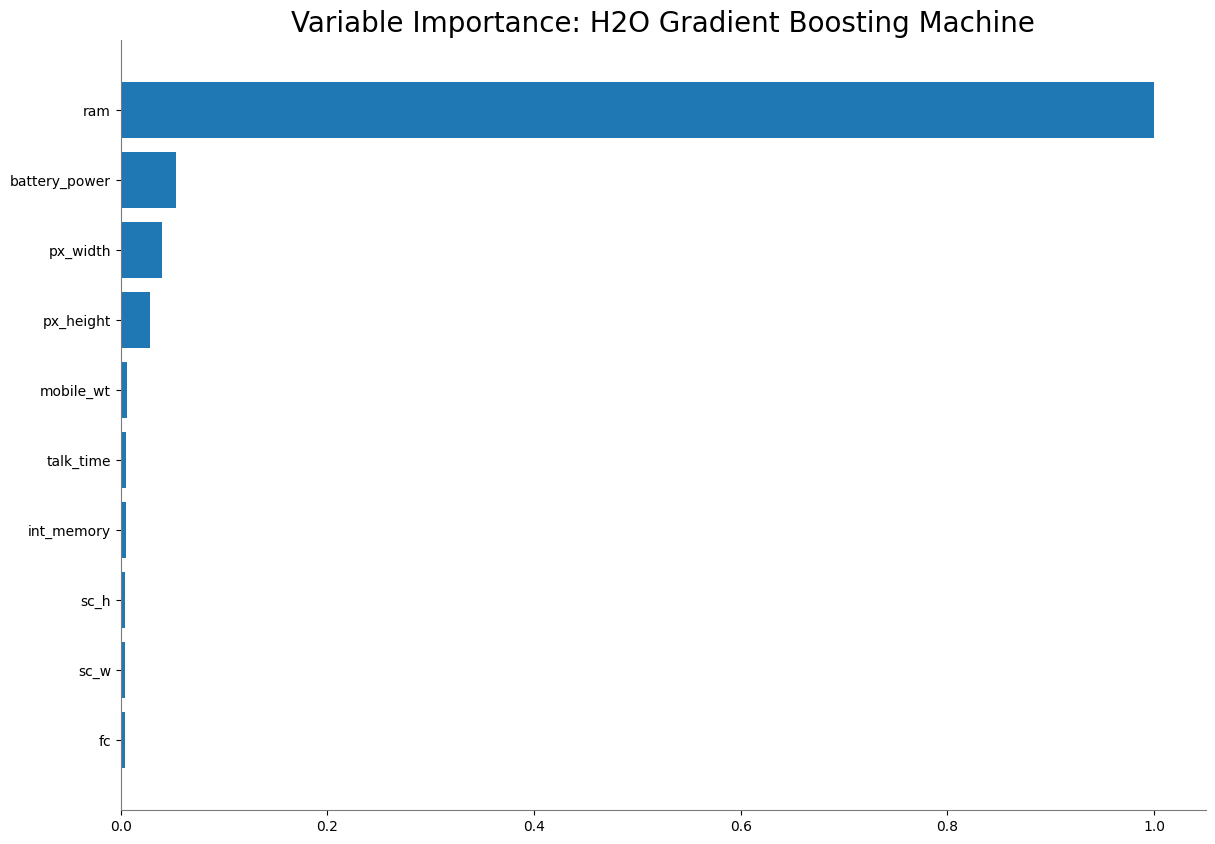

<Figure size 640x480 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


The above plot shows the importance of each feature in the model's predictions. We can see that ram is the most important feature

This plot shows the standardized coefficients of the features used in the model, which helps in understanding the impact of each feature on the model's predictions. As we can see ram has the most positive impact on our dependent variable.

In [76]:
mod_perf = best_model.model_performance(df_test)
mod_perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.07959042140144278
RMSE: 0.2821177438613934
MAE: 0.18438677499385137
RMSLE: 0.13912892198342283
Mean Residual Deviance: 0.07959042140144278

In [77]:
# Get the hyperparameters of the best model
hyperparameters = best_model.actual_params

# Display important hyperparameters
print("Important hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Important hyperparameters:
model_id: GBM_grid_1_AutoML_2_20240403_30019_model_12
training_frame: AutoML_2_20240403_30019_training_py_16_sid_bedf
validation_frame: None
nfolds: 5
keep_cross_validation_models: False
keep_cross_validation_predictions: True
keep_cross_validation_fold_assignment: False
score_each_iteration: False
score_tree_interval: 5
fold_assignment: Modulo
fold_column: None
response_column: price_range
ignored_columns: []
ignore_const_cols: True
offset_column: None
weights_column: None
balance_classes: False
class_sampling_factors: None
max_after_balance_size: 5.0
max_confusion_matrix_size: 20
ntrees: 57
max_depth: 14
min_rows: 1.0
nbins: 20
nbins_top_level: 1024
nbins_cats: 1024
r2_stopping: 1.7976931348623157e+308
stopping_rounds: 0
stopping_metric: deviance
stopping_tolerance: 0.025047007249281213
max_runtime_secs: 30.0
seed: 28
build_tree_one_node: False
learn_rate: 0.1
learn_rate_annealing: 1.0
distribution: gaussian
quantile_alpha: 0.5
tweedie_power: 1.5
huber_alph

# Shap analysis for best automl model

In [44]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.9 MB/s eta 0:00:00


In [86]:
import shap

In [87]:

leaderboard = aml.leaderboard

model_id = leaderboard[7, "model_id"]

model_id

model = h2o.get_model(model_id)

In [45]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import h2o
from h2o.automl import H2OAutoML

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/jayanti-neu/dsem-assignment3/main/train.csv")


df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
X = df.drop('price_range', axis=1)
y = df['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)


print(X_train.shape , X_test.shape)

(1400, 20) (600, 20)


In [50]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

LogisticRegression(multi_class='ovr')

In [51]:
# Make predictions on the scaled test dataset
y_pred = logreg.predict(X_test_scaled)


from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8083333333333333


In [52]:
# Print the coefficients for each binary logistic regression model
for i, coef in enumerate(logreg.coef_):
    print(f"Coefficients for class {i}:")
    for feature, weight in zip(X.columns, coef):
        print(f"{feature}: {weight:.3f}")
    print("\n")


Coefficients for class 0:
battery_power: -2.000
blue: 0.063
clock_speed: 0.110
dual_sim: 0.001
fc: -0.019
four_g: 0.062
int_memory: -0.234
m_dep: 0.054
mobile_wt: 0.116
n_cores: 0.127
pc: -0.034
px_height: -1.227
px_width: -1.092
ram: -8.063
sc_h: 0.162
sc_w: -0.019
talk_time: -0.041
three_g: -0.080
touch_screen: 0.039
wifi: 0.072


Coefficients for class 1:
battery_power: -0.016
blue: -0.014
clock_speed: -0.040
dual_sim: 0.122
fc: 0.007
four_g: -0.021
int_memory: 0.068
m_dep: 0.106
mobile_wt: -0.011
n_cores: -0.154
pc: 0.028
px_height: 0.032
px_width: 0.001
ram: -0.612
sc_h: -0.028
sc_w: -0.008
talk_time: 0.093
three_g: 0.031
touch_screen: -0.011
wifi: 0.036


Coefficients for class 2:
battery_power: -0.140
blue: -0.058
clock_speed: -0.023
dual_sim: -0.051
fc: 0.138
four_g: -0.171
int_memory: -0.107
m_dep: -0.065
mobile_wt: 0.153
n_cores: 0.109
pc: -0.082
px_height: 0.023
px_width: -0.063
ram: 0.620
sc_h: -0.123
sc_w: 0.047
talk_time: 0.014
three_g: 0.149
touch_screen: -0.023
wifi: -0


The coefficient value indicates the effect of the corresponding feature on the log-odds of belonging to the respective class.

Positive coefficients indicate that an increase in the feature value makes it more likely to belong to the class, while negative coefficients indicate the opposite.

The magnitude of the coefficient represents the strength of the effect. Larger magnitude coefficients have a more significant impact on the prediction.

Taking the example of ram which is one of the significant predictors :

In the first set of coefficients class 0: higher value of 'ram' has a large negative coefficient (-8.063), indicating that higher RAM is associated with a lower likelihood of belonging to class 0

class 1: 'ram' also has a negative coefficient (-0.612), but the magnitude is smaller, indicating a weaker effect compared to class 0.

class 2: The most significant coefficient is of ram, with a positive value, which means that starting class 2, the increase in ram value will increase the probability of the class.

class 3: All battery_power, px_height, px_width, and ram are the variables with the most significant positive coefficients, which means that increase in their values will highly increase the probability of getting this class

In [53]:
import shap

explainer = shap.Explainer(logreg, X_train)

linear_shap_values = explainer(X_train)

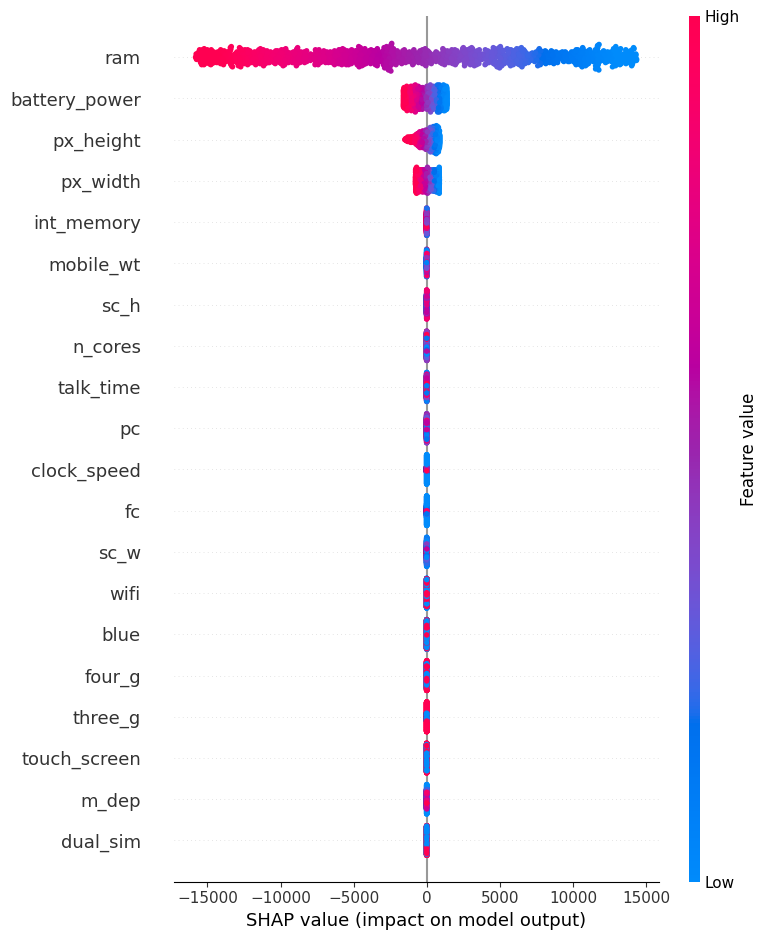

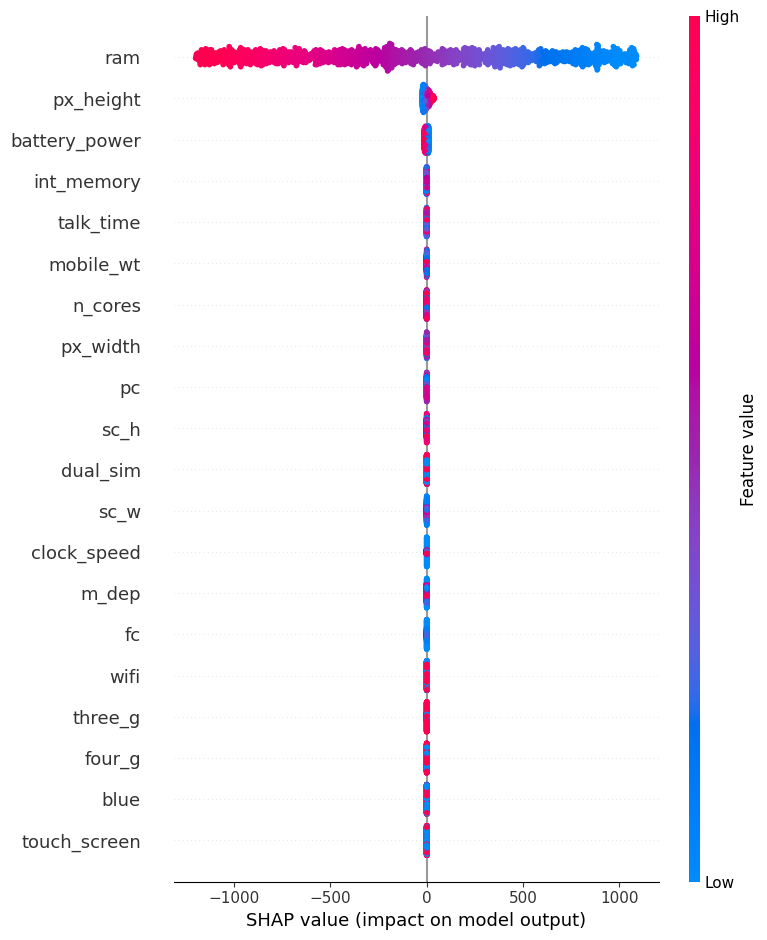

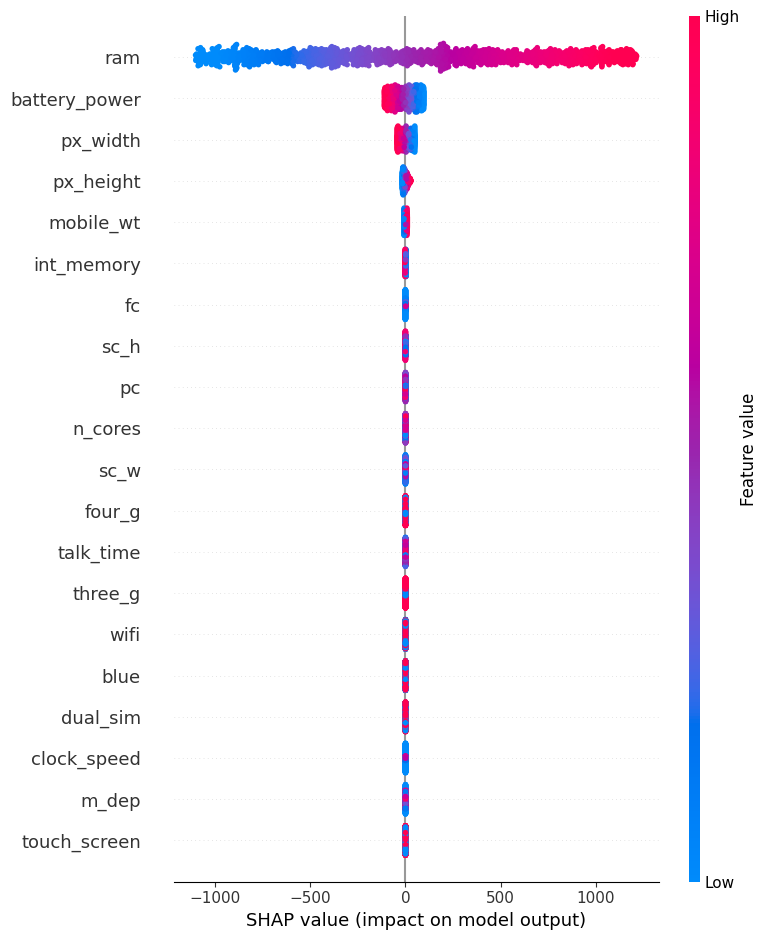

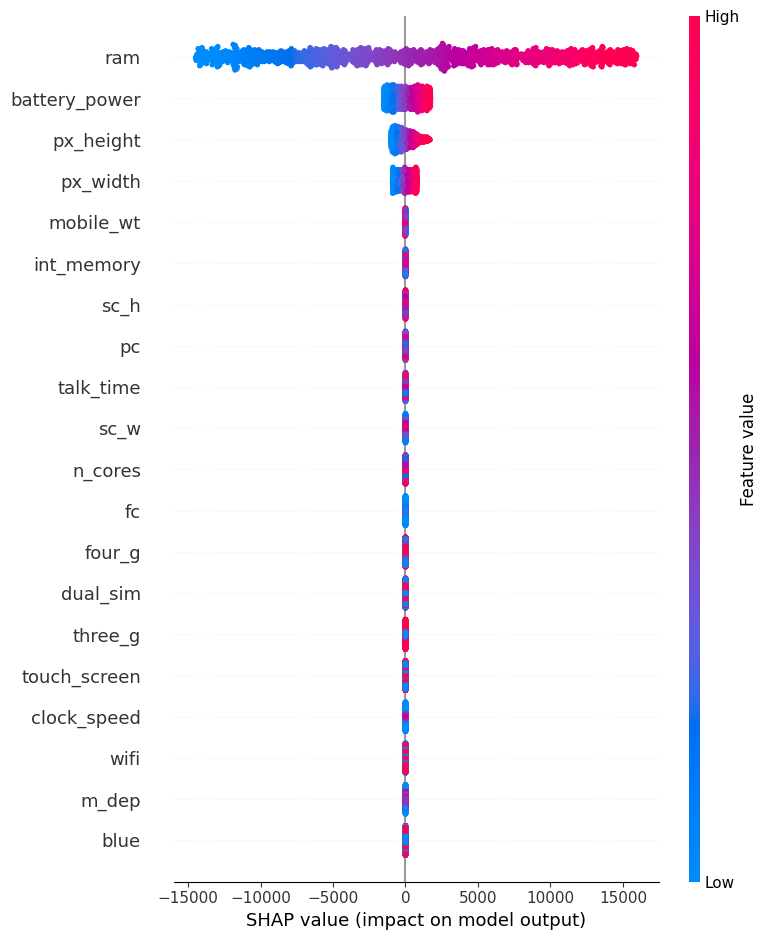

In [55]:

class_index = 0

for class_index in range(4):
  shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

class 0: looking at the shap values for the most significant features they show a strong negative trend which means that their increase will reduce the likelihood of this class.

class 1: it is observed that ram and px_width show a negative trend, while battery_power and px_height show a somewhat positive trend. the increase in battery_power and px_height will increase the likelihood of this class, even if by a little.

class 2: ram shows a strong positive trend, while px_height and mobile_wt show a little positive trend. battery_power and px_width still show negative trend

class 3: all the significant features show a very strong positive trend, which in this case, indicates that an increase in any one of their values will highly increase the likelihood of the occurence of this class

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf0= RandomForestClassifier(n_estimators=100,random_state=1200)
clf0.fit(X_train,y_train)
std = np.std([tree.feature_importances_ for tree in clf0.estimators_], axis=0)
feature_importances = pd.Series(clf0.feature_importances_, index=X_train.columns)

print('Score of RF model on test split\n',clf0.score(X_test,y_test))


explainer = shap.TreeExplainer(clf0)
shap_values = explainer.shap_values(X_train)

print('Expected Value:', explainer.expected_value)

Score of RF model on test split
 0.8733333333333333
Expected Value: [0.24342143 0.25356429 0.25030714 0.25270714]


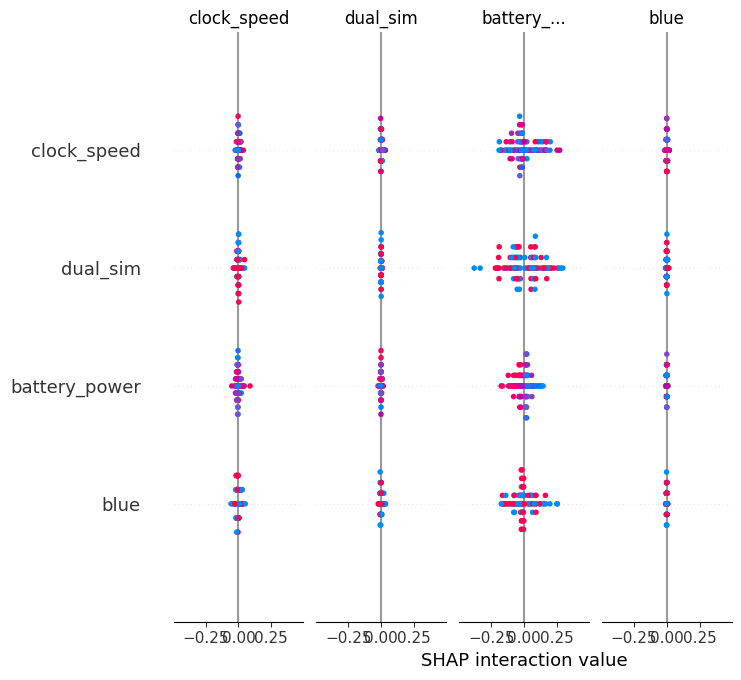

In [59]:
X_sample = X_train.sample(100)  # Adjust sample size as needed
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

The color intensity on the bar represents the average absolute SHAP value for a feature. Higher absolute values (darker colors) indicate greater feature importance. Positive values (reddish) mean the feature generally pushes the model's prediction towards a higher class value, while negative values (bluish) mean it pushes the prediction towards a lower class value.

from the output above it appears that clock_speed is the most important feature overall, followed by battery_power

# Conclusion


Exploratory Data Analysis (EDA) was conducted to understand the distribution and characteristics of predictor variables, as well as to assess feature importance and correlations.

AutoML techniques were employed to select the most suitable model for the dataset by evaluating multiple algorithms.

A logistic regression model was applied to interpret its coefficients, providing insights into how each feature impacts mobile price prediction across various classes.

Utilizing a Decision Tree model enabled capturing complex, nonlinear relationships and interactions among features.

SHAP (SHapley Additive exPlanations) analysis was performed on the models to delve deeper into feature importance and their contributions to individual predictions.

Consistency observed in the importance of variables across different analyses indicates the effectiveness of SHAP analysis in capturing the dataset's dynamics

**Q1: What is the main inquiry?**

The primary focus is on analyzing a dataset related to mobile price classification to discern the factors influencing mobile phone pricing. Specifically, the objective is to understand the correlation between various attributes (such as battery power, RAM, etc.) and the price range of mobile devices.

**Q2: What actions were taken?**

Explored the dataset through Exploratory Data Analysis (EDA) to comprehend the distribution and characteristics of predictor variables, as well as feature importance and correlations.
Employed AutoML methodologies to identify the most suitable model by comparing several algorithms.
Utilized logistic regression and decision tree models to interpret the impact of features and capture intricate relationships.
Conducted SHAP analysis to gain insights into feature importance and contributions to individual predictions across different models.

**Q3: How effective were the approaches?**

The analysis gave valuable insights into dataset characteristics and the importance of features.
AutoML streamlined the model selection process, allowing in the identification of the most optimal model.
Logistic regression allowed to show linear relationships and random forest tree models facilitated the interpretation of feature impacts and the capture of complex relationships.
SHAP analysis effectively elucidated feature importance and contributions to predictions, ensuring transparency and interpretability.

**Q4: What insights were gained?**

The significance of conducting comprehensive Exploratory Data Analysis (EDA) to grasp dataset characteristics and feature importance.
The efficacy of AutoML techniques in efficiently selecting the most suitable model by evaluating various algorithms.
Understanding how to interpret logistic regression and decision tree models to discern feature impacts and capture non-linear relationships.
The importance of SHAP analysis in gaining insights into feature importance and contributions to predictions across different models, ensuring model transparency and interpretability.






References

https://github.com/aiskunks/aiskunks/tree/main/AISkunks/What_We_Have_Done#Articles

https://christophm.github.io/interpretable-ml-book/shap.html

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel

https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1

MIT License

Copyright (c) 2024 jayanti-neu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.